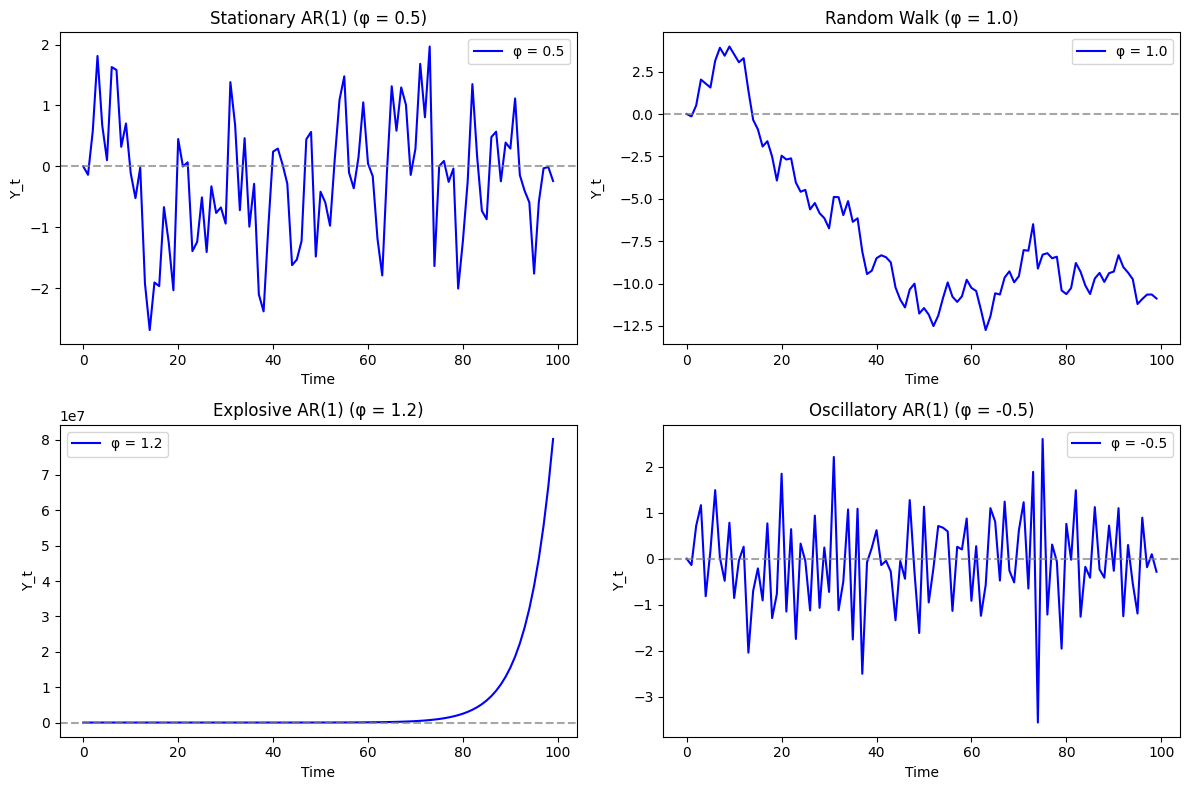

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate AR(1) series
def generate_ar1(phi, n=100, seed=42):
    np.random.seed(seed)
    y = np.zeros(n)
    epsilon = np.random.normal(0, 1, n)  # White noise

    for t in range(1, n):
        y[t] = phi * y[t-1] + epsilon[t]  # AR(1) equation
    
    return y

# Set parameters
n_samples = 100
phi_values = [0.5, 1.0, 1.2, -0.5]  # Different phi values for different behaviors
titles = [
    "Stationary AR(1) (φ = 0.5)",
    "Random Walk (φ = 1.0)",
    "Explosive AR(1) (φ = 1.2)",
    "Oscillatory AR(1) (φ = -0.5)"
]

# Plot the different AR(1) series
plt.figure(figsize=(12, 8))
for i, phi in enumerate(phi_values):
    plt.subplot(2, 2, i+1)
    y = generate_ar1(phi, n=n_samples)
    plt.plot(y, label=f"φ = {phi}", color='b')
    plt.axhline(0, color='gray', linestyle='--', alpha=0.7)  # Mean line
    plt.xlabel("Time")
    plt.ylabel("Y_t")
    plt.title(titles[i])
    plt.legend()

plt.tight_layout()
plt.show()


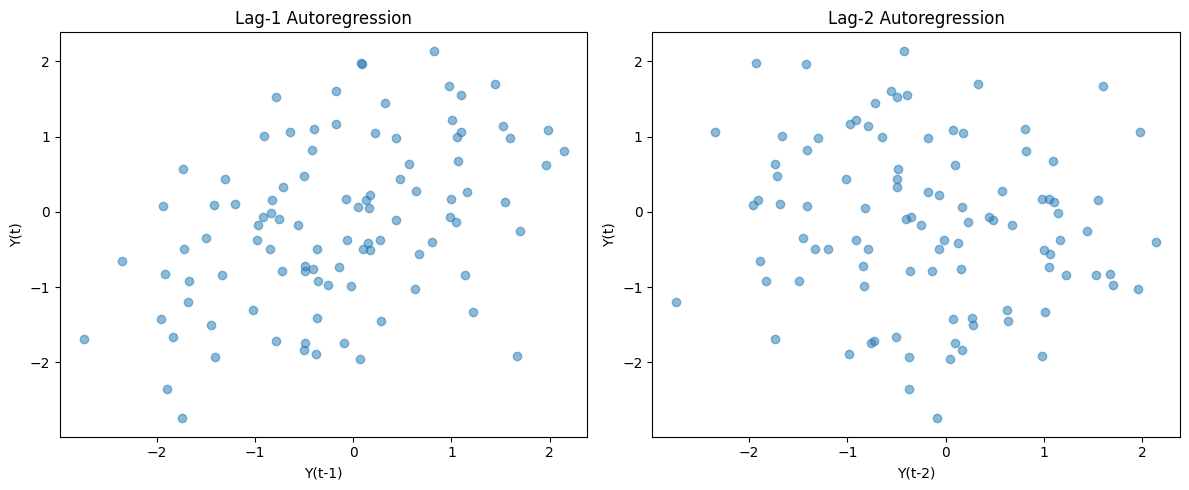

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate an AR(2) time series
def generate_ar2(phi1, phi2, n=100, seed=42):
    np.random.seed(seed)
    y = np.zeros(n)
    epsilon = np.random.normal(0, 1, n)  # White noise

    # Initialize with two random values
    y[0], y[1] = np.random.normal(0, 1, 2)
    
    for t in range(2, n):
        y[t] = phi1 * y[t-1] + phi2 * y[t-2] + epsilon[t]  # AR(2) equation
    
    return y

# Generate AR(2) series with lag relationships
phi1, phi2 = 0.6, -0.3  # Example AR(2) coefficients
n_samples = 100
y = generate_ar2(phi1, phi2, n=n_samples)

# Create DataFrame with lagged values
df = pd.DataFrame({'Y_t': y, 'Y_t-1': np.roll(y, 1), 'Y_t-2': np.roll(y, 2)})

# Drop first two rows (NaN due to shifting)
df = df.iloc[2:]

# Plot scatter plots for lag relationships
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Y_t-1'], df['Y_t'], alpha=0.5)
plt.xlabel('Y(t-1)')
plt.ylabel('Y(t)')
plt.title('Lag-1 Autoregression')

plt.subplot(1, 2, 2)
plt.scatter(df['Y_t-2'], df['Y_t'], alpha=0.5)
plt.xlabel('Y(t-2)')
plt.ylabel('Y(t)')
plt.title('Lag-2 Autoregression')

plt.tight_layout()
plt.show()


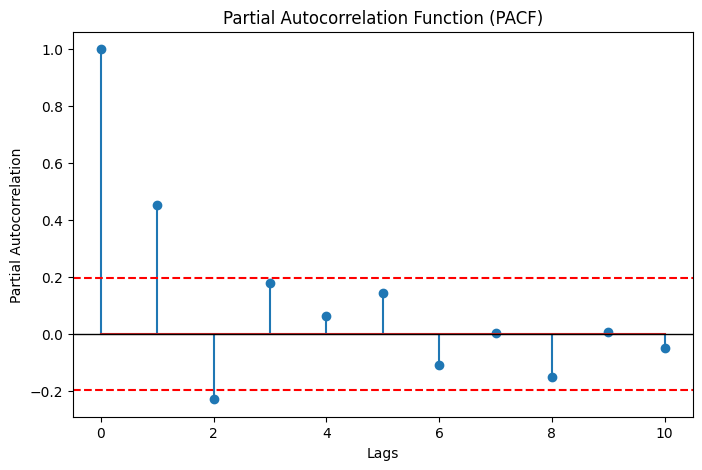

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf

# Generate an AR(3) process (true p = 3)
np.random.seed(42)
ar_params = [0.6, -0.3, 0.2]  # AR coefficients for AR(3)
ma_params = []  # No MA terms
ar = np.r_[1, -np.array(ar_params)]  # Convert to AR process
ma = np.r_[1, ma_params]  # Convert to MA process
simulated_data = ArmaProcess(ar, ma).generate_sample(nsample=100)

# Compute PACF to determine p
pacf_values = pacf(simulated_data, nlags=10)

# Plot PACF
plt.figure(figsize=(8, 5))
plt.stem(range(len(pacf_values)), pacf_values)
plt.axhline(0, color='black', linewidth=1)
plt.axhline(1.96/np.sqrt(len(simulated_data)), linestyle='--', color='red')  # Significance threshold
plt.axhline(-1.96/np.sqrt(len(simulated_data)), linestyle='--', color='red')
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


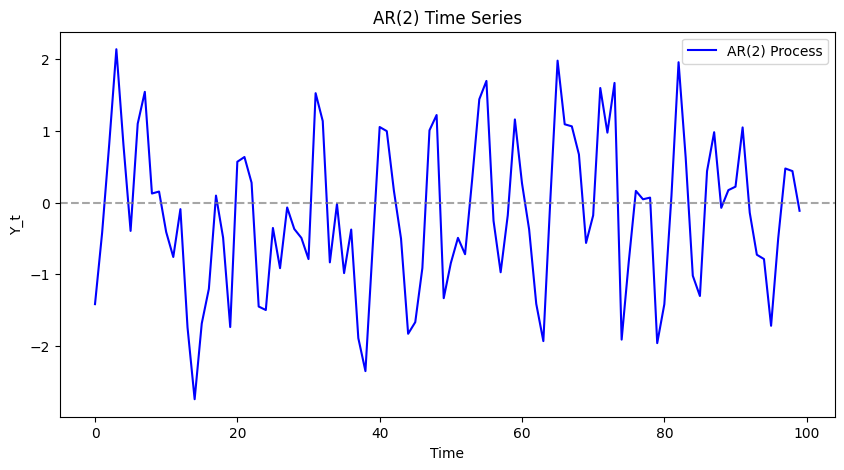

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# AR(2) parameters
phi1, phi2 = 0.6, -0.3
n = 100
np.random.seed(42)
y = np.zeros(n)
epsilon = np.random.normal(0, 1, n)

# Generate AR(2) series
y[0], y[1] = np.random.normal(0, 1, 2)  # Start with two random values
for t in range(2, n):
    y[t] = phi1 * y[t-1] + phi2 * y[t-2] + epsilon[t]

# Plot the AR(2) series
plt.figure(figsize=(10, 5))
plt.plot(y, label="AR(2) Process", color="b")
plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Y_t")
plt.title("AR(2) Time Series")
plt.legend()
plt.show()


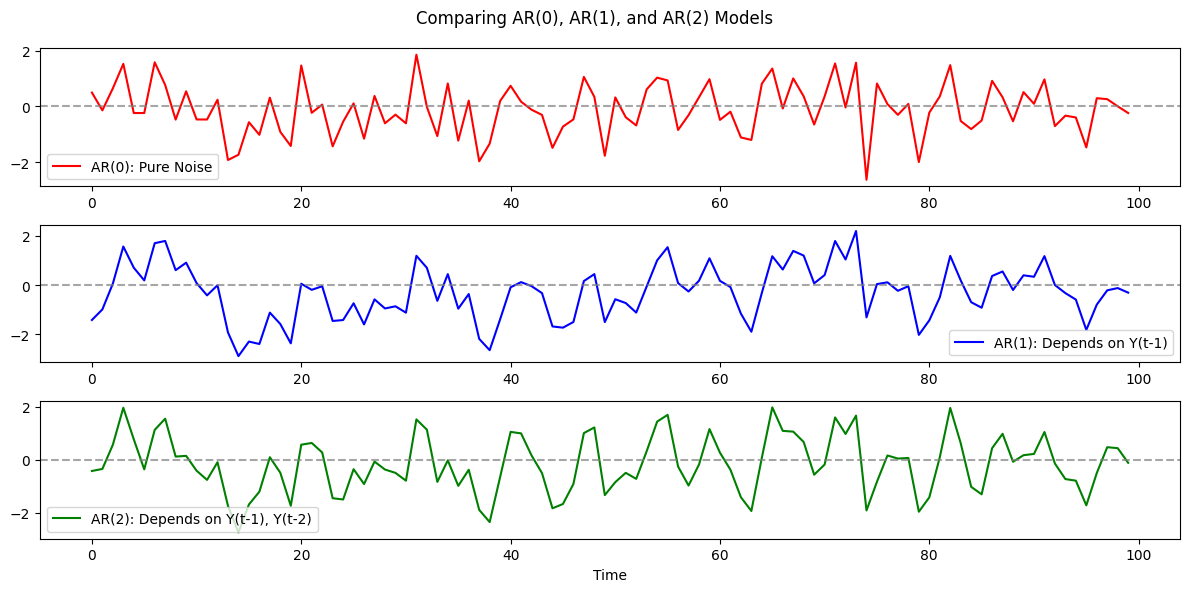

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of time steps
n = 100

# Generate white noise
epsilon = np.random.normal(0, 1, n)

# Initialize time series
y_ar0 = epsilon.copy()  # AR(0) is pure noise
y_ar1 = np.zeros(n)
y_ar2 = np.zeros(n)

# AR(1) parameters
phi1_ar1 = 0.6  # AR(1) coefficient
y_ar1[0] = np.random.normal(0, 1)
for t in range(1, n):
    y_ar1[t] = phi1_ar1 * y_ar1[t-1] + epsilon[t]  # AR(1) equation

# AR(2) parameters
phi1_ar2, phi2_ar2 = 0.6, -0.3  # AR(2) coefficients
y_ar2[0], y_ar2[1] = np.random.normal(0, 1, 2)
for t in range(2, n):
    y_ar2[t] = phi1_ar2 * y_ar2[t-1] + phi2_ar2 * y_ar2[t-2] + epsilon[t]  # AR(2) equation

# Plot all series
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(y_ar0, label="AR(0): Pure Noise", color="red")
plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(y_ar1, label="AR(1): Depends on Y(t-1)", color="blue")
plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(y_ar2, label="AR(2): Depends on Y(t-1), Y(t-2)", color="green")
plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.legend()

plt.xlabel("Time")
plt.suptitle("Comparing AR(0), AR(1), and AR(2) Models")
plt.tight_layout()
plt.show()


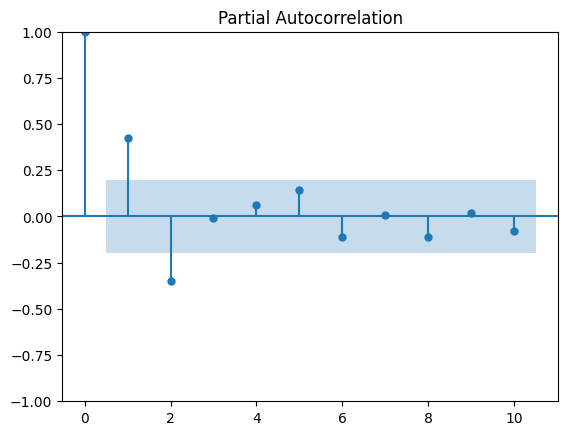

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Generate some sample data
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(42)
ar_params = [0.6, -0.3]  # AR(2) model for example
ma_params = []
ar = np.r_[1, -np.array(ar_params)]  # Convert to AR coefficients
ma = np.r_[1, ma_params]  # MA coefficients (none here)
simulated_data = ArmaProcess(ar, ma).generate_sample(nsample=100)

# Plot PACF
plot_pacf(simulated_data, lags=10)
plt.show()


In [8]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import aic, bic

# Fit AR model for different p values and compute AIC/BIC
best_p = 0
min_aic = np.inf
min_bic = np.inf

for p in range(1, 10):  # Test different values of p
    model = AutoReg(simulated_data, lags=p)
    model_fitted = model.fit()
    print(f"p = {p} | AIC = {model_fitted.aic} | BIC = {model_fitted.bic}")
    if model_fitted.aic < min_aic:
        min_aic = model_fitted.aic
        best_p = p

print(f"Best p based on AIC: {best_p}")


p = 1 | AIC = 280.000498187154 | BIC = 287.78585773755776
p = 2 | AIC = 267.2043952457041 | BIC = 277.54426516038643
p = 3 | AIC = 266.7687219953163 | BIC = 279.6422768878332
p = 4 | AIC = 263.11211104534857 | BIC = 278.49820019415563
p = 5 | AIC = 261.28318923091166 | BIC = 279.16032747211545
p = 6 | AIC = 260.46008183183073 | BIC = 280.8064400899908
p = 7 | AIC = 256.42788568972924 | BIC = 279.22128112810856
p = 8 | AIC = 254.41981858654088 | BIC = 279.6377043570313
p = 9 | AIC = 254.62616128447368 | BIC = 282.245615856159
Best p based on AIC: 8


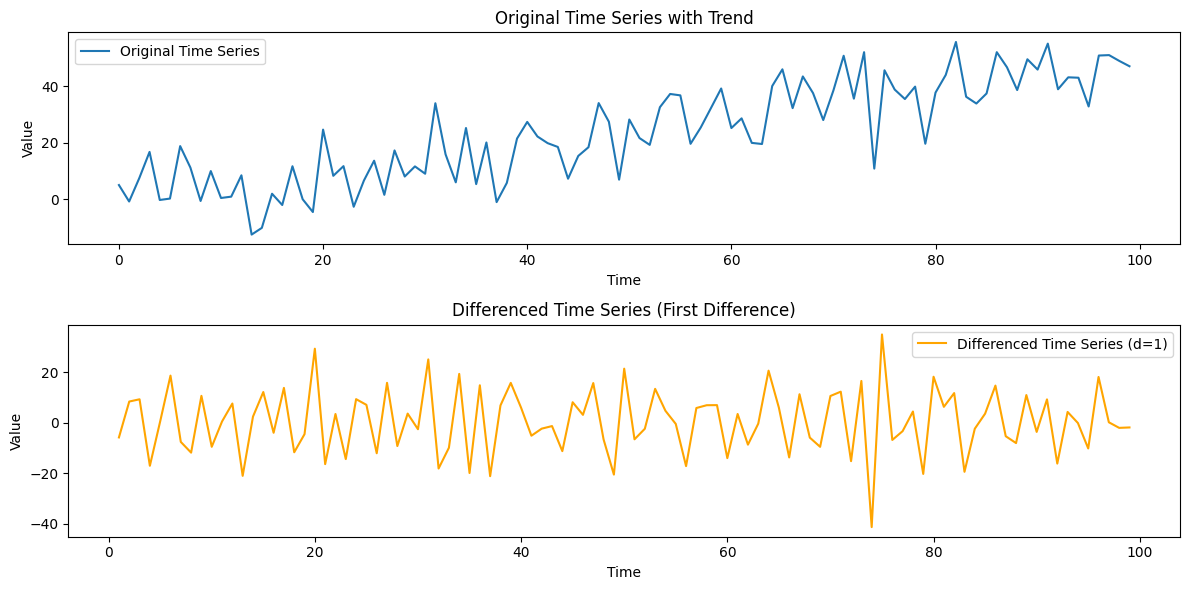

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Simulate a time series with a trend
np.random.seed(42)
n = 100
time = np.arange(n)
data = 0.5 * time + np.random.normal(0, 10, n)  # A series with a linear trend

# Plot the original time series
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, data, label="Original Time Series")
plt.title("Original Time Series with Trend")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

# Apply first differencing (d=1)
differenced_data = np.diff(data)  # First difference

# Plot the differenced data
plt.subplot(2, 1, 2)
plt.plot(time[1:], differenced_data, label="Differenced Time Series (d=1)", color='orange')
plt.title("Differenced Time Series (First Difference)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()


ADF Statistic: -0.6116640386850328, p-value: 0.8683245904473935
ARIMA(1, 1, 0) - AIC: 765.7401383476448, BIC: 770.930378047914
ARIMA(1, 1, 1) - AIC: 740.2242845728845, BIC: 748.0096441232882
ARIMA(1, 1, 2) - AIC: 740.8091550977507, BIC: 751.189634498289
ARIMA(1, 1, 3) - AIC: 741.1009197865253, BIC: 754.0765190371983
ARIMA(1, 1, 4) - AIC: 742.7753323520744, BIC: 758.346051452882
Best q based on AIC/BIC: 1


<Figure size 1000x600 with 0 Axes>

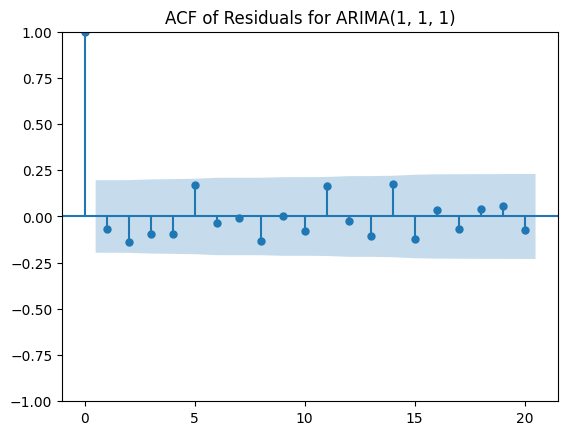

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Simulate some time series data (or use your own dataset)
np.random.seed(42)
n = 100
data = 0.5 * np.arange(n) + np.random.normal(0, 10, n)  # A series with a trend and noise

# Step 1: Check for stationarity using ADF test
adf_result = adfuller(data)
print(f"ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}")

# Step 2: Try different q values and fit ARIMA models, then compare AIC/BIC
p = 1  # Set p based on earlier model selection
d = 1  # Assume we've differenced the data once (d=1)

best_aic = float('inf')
best_bic = float('inf')
best_q = None

# Test different q values from 0 to 4
for q in range(5):  # Test q=0, 1, 2, 3, 4
    model = ARIMA(data, order=(p, d, q))
    model_fitted = model.fit()
    
    print(f"ARIMA({p}, {d}, {q}) - AIC: {model_fitted.aic}, BIC: {model_fitted.bic}")
    
    # Select the model with the lowest AIC/BIC
    if model_fitted.aic < best_aic:
        best_aic = model_fitted.aic
        best_q = q
    if model_fitted.bic < best_bic:
        best_bic = model_fitted.bic

# Print the best q value based on AIC/BIC
print(f"Best q based on AIC/BIC: {best_q}")

# Step 3: Plot the ACF of the residuals for the best q model
best_model = ARIMA(data, order=(p, d, best_q))
best_model_fitted = best_model.fit()

# Plot the ACF of residuals for the best model
residuals = best_model_fitted.resid
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20)
plt.title(f"ACF of Residuals for ARIMA({p}, {d}, {best_q})")
plt.show()


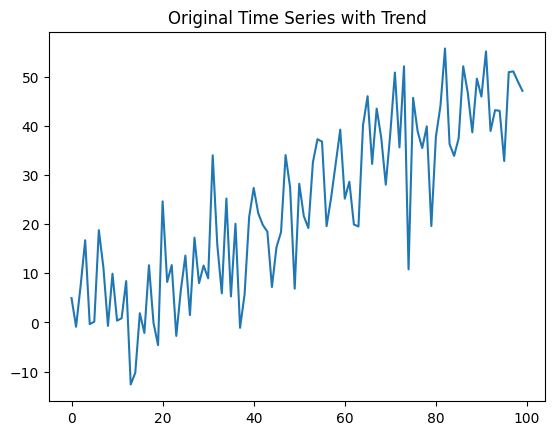

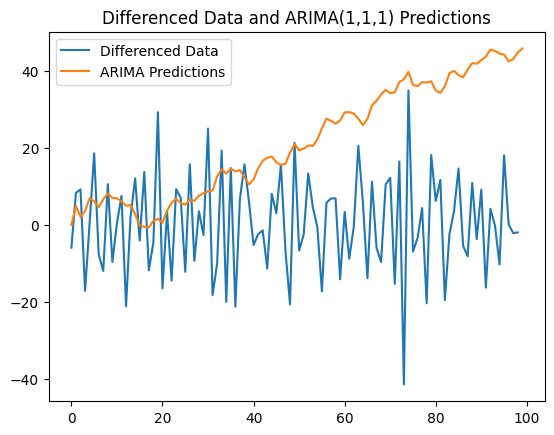

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

# Simulate a time series with a trend
np.random.seed(42)
n = 100
time = np.arange(n)
data = 0.5 * time + np.random.normal(0, 10, n)  # A series with a linear trend

# Plot the original time series
plt.plot(time, data)
plt.title("Original Time Series with Trend")
plt.show()

# Fit ARIMA model (d=1 means first differencing)
model = ARIMA(data, order=(1, 1, 1))  # ARIMA(1, 1, 1) where d=1
model_fitted = model.fit()

# Plot the differenced data and model's predictions
differenced_data = np.diff(data)  # First difference
plt.plot(differenced_data, label="Differenced Data")
plt.plot(model_fitted.fittedvalues, label="ARIMA Predictions")
plt.title("Differenced Data and ARIMA(1,1,1) Predictions")
plt.legend()
plt.show()
